In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
im=cv2.imread("pokemon.jpg")

In [3]:
im

array([[[113, 148,  81],
        [113, 148,  81],
        [114, 149,  82],
        ...,
        [237, 236, 116],
        [237, 236, 116],
        [237, 236, 116]],

       [[113, 148,  81],
        [114, 149,  82],
        [114, 149,  82],
        ...,
        [236, 235, 113],
        [236, 235, 115],
        [236, 235, 113]],

       [[114, 150,  80],
        [114, 150,  80],
        [115, 151,  81],
        ...,
        [235, 235, 111],
        [235, 234, 112],
        [235, 235, 111]],

       ...,

       [[ 91, 161, 191],
        [ 91, 161, 191],
        [ 91, 161, 191],
        ...,
        [ 99, 232, 176],
        [ 99, 232, 176],
        [ 99, 232, 176]],

       [[ 91, 161, 191],
        [ 91, 161, 191],
        [ 91, 161, 191],
        ...,
        [ 99, 232, 176],
        [ 99, 232, 176],
        [ 99, 232, 176]],

       [[ 91, 161, 191],
        [ 91, 161, 191],
        [ 91, 161, 191],
        ...,
        [ 99, 232, 176],
        [ 99, 232, 176],
        [ 99, 232, 176]]

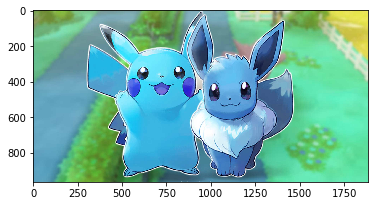

In [4]:
plt.imshow(im)
plt.show()

In [5]:
#cv2.imshow(window name,matrix i.e im)
cv2.imshow("pokemon",im)
cv2.waitKey(0)
cv2.destroyAllWindows()

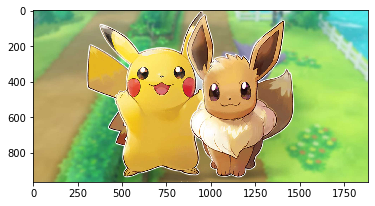

In [6]:
im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)    # swapped the color matrix bgr to rgb
plt.imshow(im)

In [7]:
#pending

# Face Detection

In [8]:
detector=cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")

In [9]:
img=cv2.imread("children.jpg")

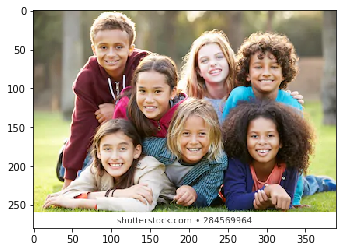

In [10]:
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)    # swapped the color matrix bgr to rgb
plt.imshow(img)

In [11]:
faces=detector.detectMultiScale(img,1.6,5)     #  (image,scaling factor,k ,k nearest neighbour thing) returns the coordinates of detected faces
print(faces)

[[205  43  51  51]
 [125  85  51  51]
 [181 138  51  51]
 [274  52  51  51]
 [269 140  51  51]
 [ 75  27  51  51]
 [ 80 158  51  51]]


In [12]:
print(faces[0])
x,y,w,h=faces[0]              # rectangle coordinates

[205  43  51  51]


In [13]:
img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)      #specified start and end of recatangle

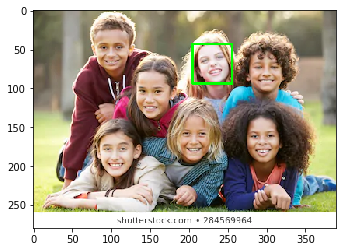

In [14]:
plt.imshow(img)

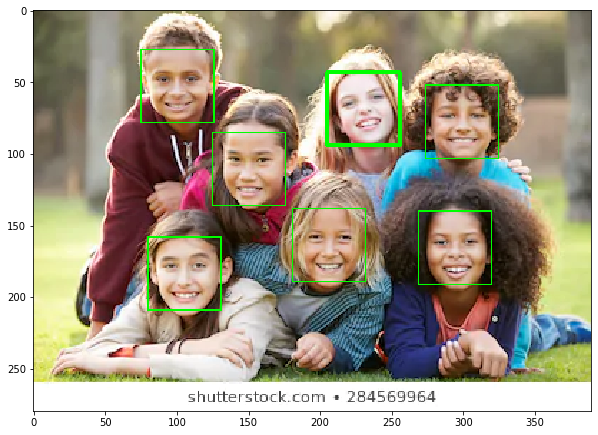

In [15]:
# NOW TO DETECT ALL FACES WE [UT RECTANGLES ON ALL FACES
for face in faces:
    x,y,w,h=face
    img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0))
    
plt.figure(figsize=(10,8))
plt.imshow(img)

# WEB CAM Detection

In [22]:
cam=cv2.VideoCapture(0)     # 0 stands for front web camera

In [23]:

while True:                         # so that we will break from loop oce we cut the webcam window
    ret,frame=cam.read()
    
    if ret==False:                  # ret is what it receives from webcam
        continue
        
    faces=detector.detectMultiScale(frame,1.3,5)
    
    for face in faces:
        x,y,w,h=face
        frame=cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0))         # modify frame 
        
    cv2.imshow("frame",frame)
    
    key_pressed=cv2.waitKey(1) & 0xFF
    
    if(key_pressed==ord('e')):
        break
                                  # to explicitly break from the loop

cam.release()                   # release webcam
cv2.destroyAllWindows()    